[[        0.             0.             0.     ...,  34400224.55
   26167229.74    27806434.    ]
 [        0.             0.             0.     ...,  12994108.06
    7410470.55     3904726.43  ]
 [    39000.        106889.         52028.     ...,         0.             0.
          0.    ]
 ..., 
 [        0.             0.             0.     ...,  30088132.96
   15070009.0799  11691367.09  ]
 [        0.             0.             0.     ...,  10633508.5
   17223651.05    15297633.04  ]
 [        0.             0.             0.     ...,  12635064.23
   14642630.21     8087301.58  ]]
[[  2.94456383e+07   3.10848425e+07   3.27240468e+07 ...,   3.44002245e+07
    2.61672297e+07   2.78064340e+07]
 [  3.98982310e+05   0.00000000e+00   0.00000000e+00 ...,   1.29941081e+07
    7.41047055e+06   3.90472643e+06]
 [  3.90000000e+04   1.06889000e+05   5.20280000e+04 ...,   1.44859100e+04
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  8.31272510e+06   4.93408311e+06   1.55544112e+06 ...,   3.00

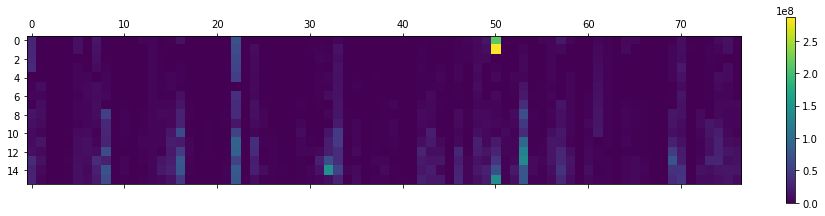

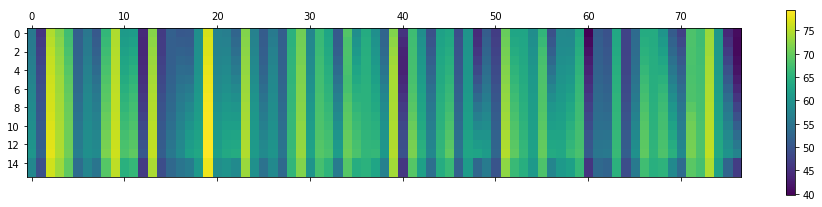

['AFG', 'AGO', 'ALB', 'ARM', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BIH', 'BOL', 'BTN', 'CAF', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COM', 'CUB', 'DJI', 'ERI', 'ETH', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GUY', 'HND', 'HTI', 'IDN', 'IND', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LBR', 'LKA', 'LSO', 'MDA', 'MDG', 'MLI', 'MMR', 'MNG', 'MOZ', 'MRT', 'MWI', 'NER', 'NGA', 'NIC', 'NPL', 'PAK', 'PNG', 'PRK', 'RWA', 'SDN', 'SEN', 'SLB', 'SLE', 'SOM', 'SSD', 'STP', 'TCD', 'TGO', 'TJK', 'TKM', 'TLS', 'TZA', 'UGA', 'UKR', 'UZB', 'VNM', 'YEM', 'ZMB', 'ZWE']


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide


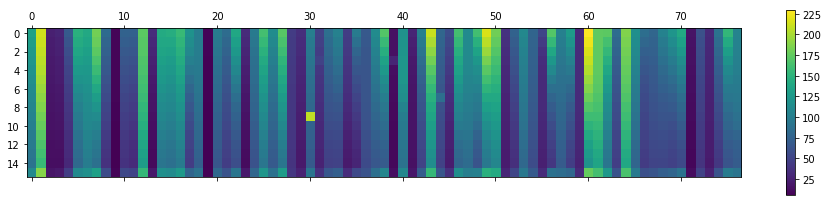

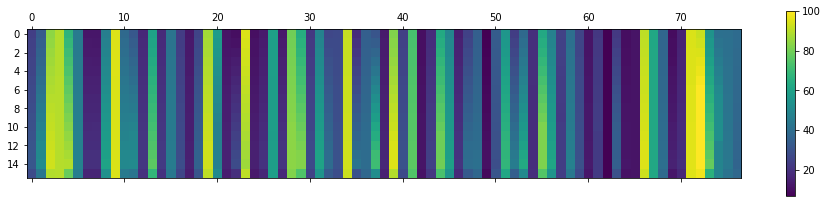

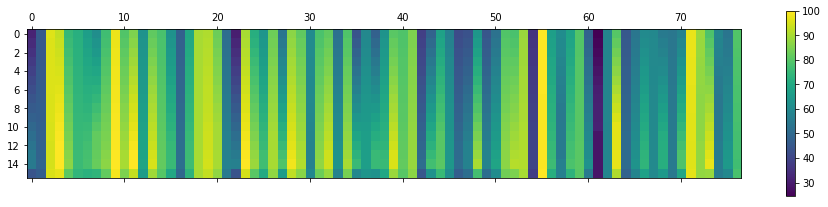

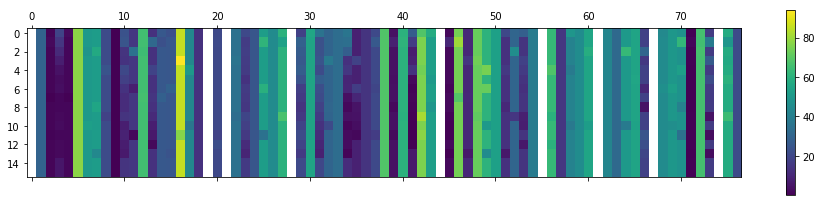

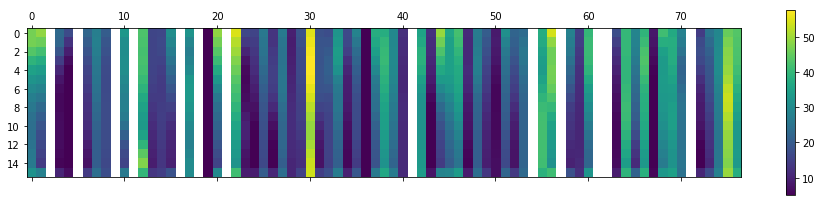

In [19]:
import csv
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from collections import defaultdict

years = np.arange(2001,2017)   # for data


def convert_to_float(data):
    data = np.array(data)
    idx = np.where(data == '')
    data[idx] = 0
    idx = np.where(data == '..')
    data[idx] = 0
    data = data.astype(float)
    row_means = np.true_divide(data.sum(1),(data!=0).sum(1))
    for i in range(data.shape[0]):
        idx = np.where(data[i,:] == 0)
        data[i,idx] = row_means[i]
            
    return data


def convert_to_float_ex(data):
    data = np.array(data)
    data = data.astype(float)
    #row_means = np.true_divide(data.sum(1),(data!=0).sum(1))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i,j] != 0:
                continue
            if j == 0 or (j!=0 and data[i,j-1]==0):
                data[i,j] = 2*data[i,j+1] - data[i,j+2]
            if j == data.shape[1]-1 or (j!=data.shape[1]-1 and data[i,j+1]==0):
                data[i,j] = 2*data[i,j-1] - data[i,j-2]    
                
    data[data <0] = 0.0
    return data

    
    
file_path_ngo_budget = 'Data/NGO_DataDisbursement.csv'
ngo_file = open(file_path_ngo_budget, 'r')
reader = csv.DictReader(ngo_file)
reader = sorted(reader, key=lambda d: d['ISO_code'])
countries = []
curr_country = ''
dict_country_data = defaultdict(list)
for row in reader:
    #print(row)
    country = row['ISO_code']
    countries.append(country)
    if curr_country != country:
        curr_country = country
    rows = [float(row[str(y)]) if row[str(y)] != '' else 0.0 for y in years ]    
    dict_country_data[curr_country].append(rows)    
    
countries = list(set(countries))
countries = sorted(countries)
country_data = []
for c in countries:
    #dict_country_data[c] = np.sum(dict_country_data[c], axis=0)
    country_data.append(np.sum(dict_country_data[c], axis=0))

country_data = np.array(country_data)
country_data = country_data.astype(float)
print(country_data)
#plt.matshow(country_data.T)
#plt.colorbar()
#plt.show()    
country_data = convert_to_float_ex(country_data)
print(country_data)
country_data = country_data.T
plt.matshow(country_data)
plt.colorbar()
plt.show()
    
file_path_l_e = 'Data/life_exp.csv'
le_file = open(file_path_l_e, 'r')
reader = csv.DictReader(le_file)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_l_e = []
for row in reader:
    if row['Country Code'] not in countries:
        continue
    #print(row['Country Code'])
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_l_e.append(rows)
    
f = 'Data/child_mort.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_ch_m = []
for row in reader:
    if row['Country Code'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_ch_m.append(rows)
    
    
file_population = 'Data/population.csv'   
pop_file = open(file_population, 'r')
reader = csv.DictReader(pop_file)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_pop = []
#2000 [YR2000]
for row in reader:
    if row['Country Code'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    
    data_pop.append(rows)
    
    
found_countries = []
f = 'Data/sanitation2.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_san = []
for row in reader:
    if row['Country Code'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    found_countries.append(row['Country Code'])
    data_san.append(rows)   
found_countries = set(found_countries) 
fail = list(set(countries) - found_countries)
for f in fail:
    print(f)

f = 'Data/water.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_water = []
for row in reader:
    if row['Country Code'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_water.append(rows) 
    
    
f = 'Data/poverty.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_poverty = []
for row in reader:
    if row['Country Code'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_poverty.append(rows)    
    
    
f = 'Data/prevalence.csv'
ff = open(f, 'r')
reader = csv.DictReader(ff)
reader = sorted(reader, key=lambda d: d['Country Code'])
data_prel = []
for row in reader:
    if row['Country Code'] not in countries:
        continue
    rows = [row[str(y)+' [YR'+str(y)+']'] for y in years ]
    data_prel.append(rows)   
    
data_l_e = convert_to_float(data_l_e)
data_l_e = data_l_e.T
plt.matshow(data_l_e)
plt.colorbar()
plt.show()
#print(data)

print(countries)

data_pop = convert_to_float(data_pop)
data_ch_m = convert_to_float(data_ch_m)
data_san = convert_to_float(data_san)
data_water = convert_to_float(data_water)
data_poverty = convert_to_float(data_poverty)
data_prel = convert_to_float(data_prel)
#data_ch_m = np.multiply(data_ch_m, data_pop) # abs valus
#data_san = np.multiply(data_san, data_pop) # abs valus
#data_ch_m = data_ch_m * 0.001
#data_san = data_san * 0.01


data_ch_m = data_ch_m.T
plt.matshow(data_ch_m)
plt.colorbar()
plt.show()

data_san = data_san.T
plt.matshow(data_san)
plt.colorbar()
plt.show()
data_water = data_water.T
plt.matshow(data_water)
plt.colorbar()
plt.show()
data_poverty = data_poverty.T
plt.matshow(data_poverty)
plt.colorbar()
plt.show()
data_prel = data_prel.T
plt.matshow(data_prel)
plt.colorbar()
plt.show()

AFG
year_series:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]
values:  [ 137.   133.8  130.3  126.8  123.2  119.6  116.3  113.2  110.4  107.6
  105.   102.3   99.5   96.7   93.9   91.1]


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


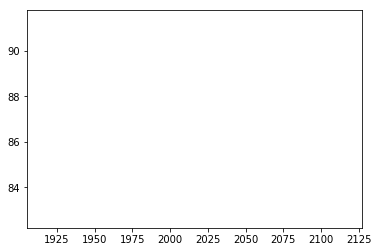

[ 86.99855607]


In [3]:
def regress(year_series, values, degree=2):
    print('year_series: ',year_series)
    print('values: ',values)
    year_series = year_series.reshape((len(year_series),1))
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(year_series, values)
    new_val = model.predict(year_series[-1]+1)
    plt.plot(years[-1]+1, new_val)
    plt.show()
    return new_val

reg_san = regress(years, data_san)
reg_water = regress(years, data_water)
    
    
